In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Load data from CSV files (adjust the file paths)
benin_data = pd.read_csv("benin-malanville.csv")
sierra_leone_data = pd.read_csv("sierraleone-bumbuna.csv")
togo_data = pd.read_csv("togo-dapaong_qc.csv")

In [3]:
# Function to process and analyze the data
def process_and_analyze(data, location_name):
    # Convert Timestamp to datetime and set as index
    data['Timestamp'] = pd.to_datetime(data['Timestamp'])
    data.set_index('Timestamp', inplace=True)
    
    # Calculate summary statistics for numeric columns
    summary_stats = data.describe()
    print(f"Summary statistics for {location_name}:")
    print(summary_stats)

    # Analyze time-series trends for key variables
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=data[['GHI', 'DNI', 'DHI', 'Tamb']])
    plt.title(f"Time-series trends for {location_name}")
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.legend(['GHI', 'DNI', 'DHI', 'Tamb'])
    plt.show()
    
    # Conduct correlation analysis to determine relationships between variables
    correlation_matrix = data.corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title(f"Correlation Matrix for {location_name}")
    plt.show()

    # Create visualizations to identify patterns or anomalies (scatter plots, box plots, histograms)
    plt.figure(figsize=(12, 6))
    sns.scatterplot(data=data, x='Tamb', y='GHI', hue='Precipitation', palette='viridis', s=20)
    plt.title(f"Scatter Plot of Tamb vs. GHI with Precipitation for {location_name}")
    plt.xlabel("Tamb (°C)")
    plt.ylabel("GHI (W/m²)")
    plt.show()

    # Box plot to detect anomalies
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=data[['GHI', 'DNI', 'DHI', 'Tamb']])
    plt.title(f"Box Plot for {location_name}")
    plt.show()

    # Histogram for distribution of GHI
    plt.figure(figsize=(12, 6))
    sns.histplot(data['GHI'], kde=True)
    plt.title(f"Histogram of GHI for {location_name}")
    plt.xlabel("GHI (W/m²)")
    plt.ylabel("Count")
    plt.show()

    # Clean the dataset by addressing anomalies or missing values
    # Replace negative values with NaN and drop them
    data.replace(-1, np.nan, inplace=True)
    data.dropna(inplace=True)

    # Check missing values after cleaning
    missing_values = data.isnull().sum()
    print(f"Missing values after cleaning for {location_name}:")
    print(missing_values)

Summary statistics for Benin - Malanville:
                 GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      240.559452     167.187516     115.358961     236.589496   
std       331.131327     261.710501     158.691074     326.894859   
min       -12.900000      -7.800000     -12.600000       0.000000   
25%        -2.000000      -0.500000      -2.100000       0.000000   
50%         1.800000      -0.100000       1.600000       4.500000   
75%       483.400000     314.200000     216.300000     463.700000   
max      1413.000000     952.300000     759.200000    1342.300000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      228.883576      28.179683      54.487969       2.121113   
std       316.536515       5.924297      28.073069       1.603466   
min         0.000000      11.000000       2.100000       0.

C:\Users\tewodros\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\tewodros\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


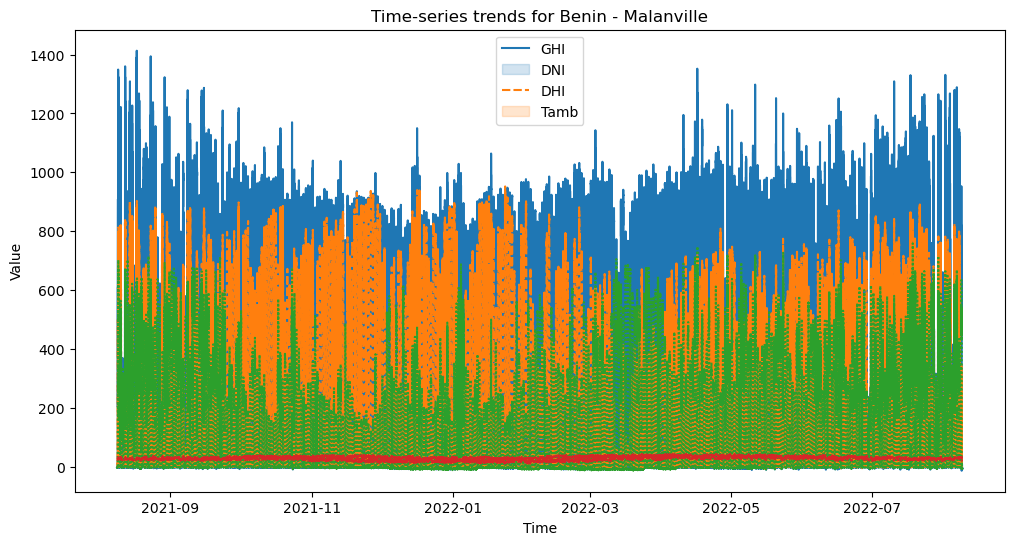

C:\Users\tewodros\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


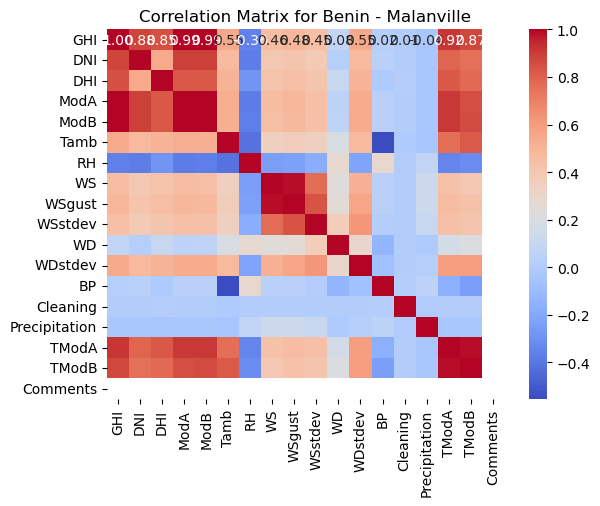

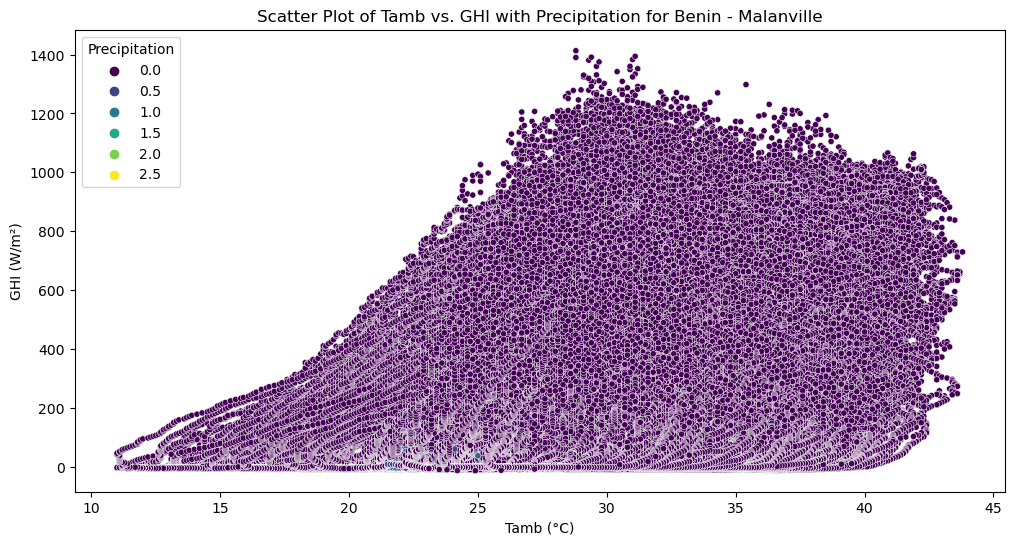

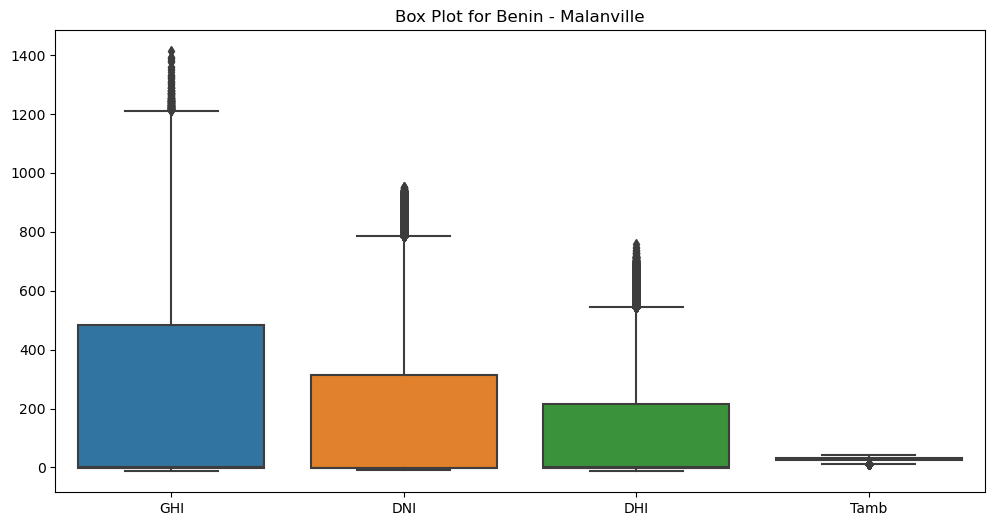

C:\Users\tewodros\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


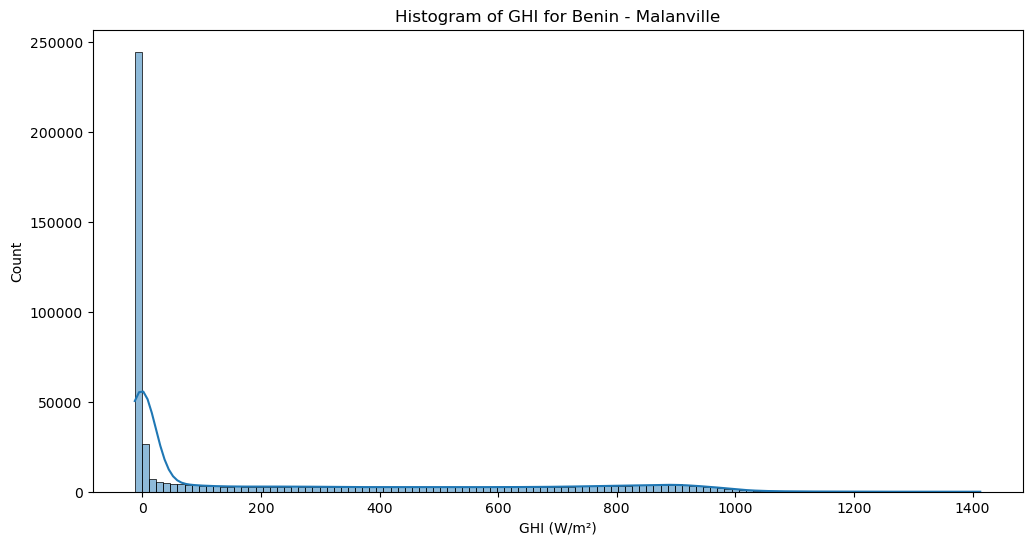

Missing values after cleaning for Benin - Malanville:
GHI              0
DNI              0
DHI              0
ModA             0
ModB             0
Tamb             0
RH               0
WS               0
WSgust           0
WSstdev          0
WD               0
WDstdev          0
BP               0
Cleaning         0
Precipitation    0
TModA            0
TModB            0
Comments         0
dtype: int64


In [4]:
# Apply the analysis on each dataset
process_and_analyze(benin_data, "Benin - Malanville")

Summary statistics for Sierra Leone - Bumbuna:
                 GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      201.957515     116.376337     113.720571     206.643095   
std       298.495150     218.652659     158.946032     300.896893   
min       -19.500000      -7.800000     -17.900000       0.000000   
25%        -2.800000      -0.300000      -3.800000       0.000000   
50%         0.300000      -0.100000      -0.100000       3.600000   
75%       362.400000     107.000000     224.700000     359.500000   
max      1499.000000     946.000000     892.000000    1507.000000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      198.114691      26.319394      79.448857       1.146113   
std       288.889073       4.398605      20.520775       1.239248   
min         0.000000      12.300000       9.900000     

C:\Users\tewodros\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\tewodros\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\tewodros\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


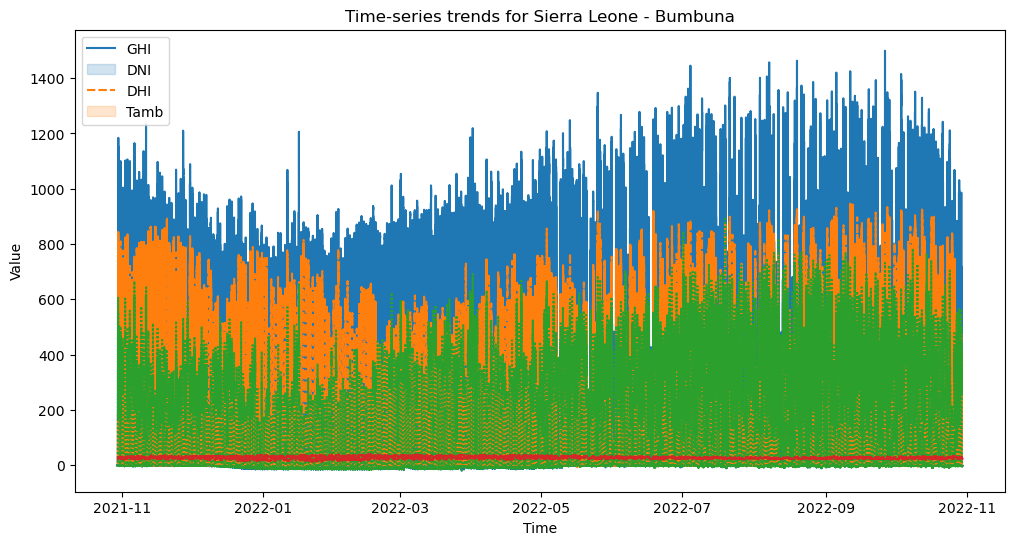

C:\Users\tewodros\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


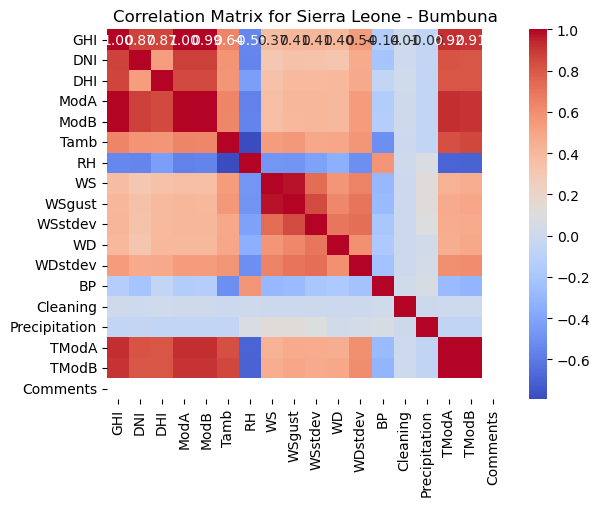

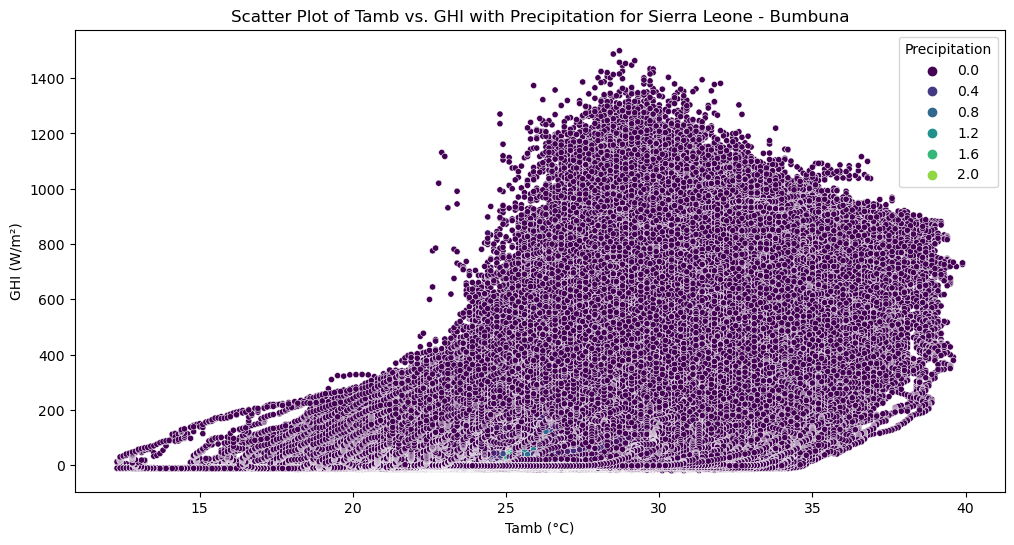

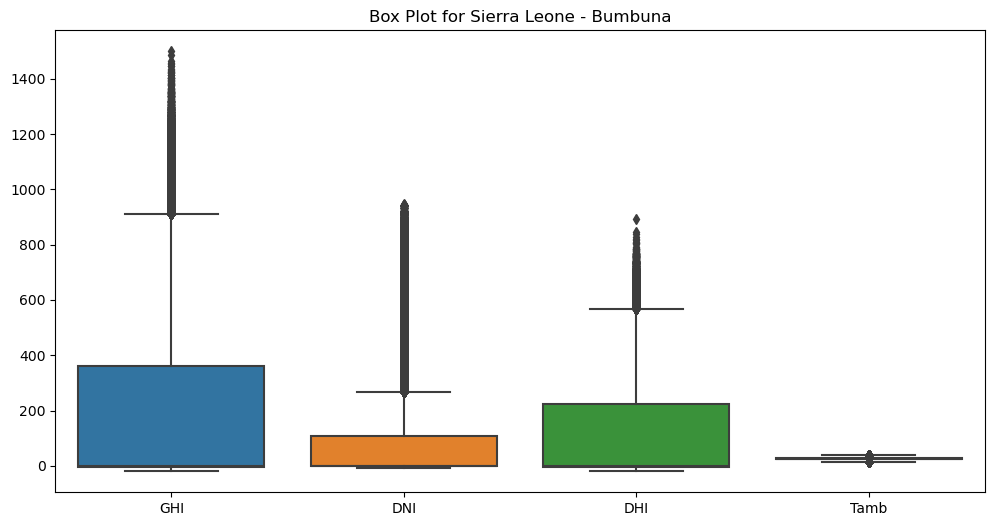

C:\Users\tewodros\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


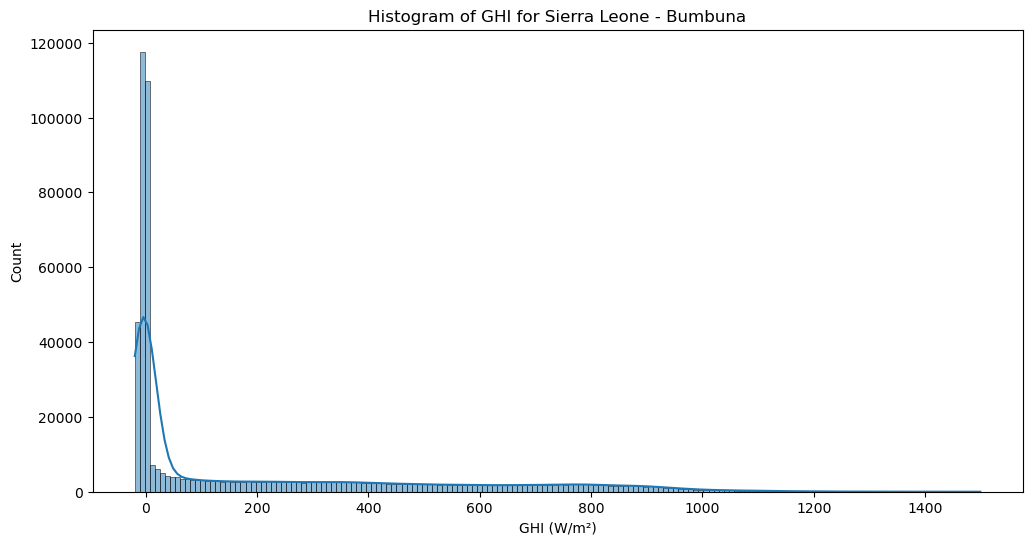

Missing values after cleaning for Sierra Leone - Bumbuna:
GHI              0
DNI              0
DHI              0
ModA             0
ModB             0
Tamb             0
RH               0
WS               0
WSgust           0
WSstdev          0
WD               0
WDstdev          0
BP               0
Cleaning         0
Precipitation    0
TModA            0
TModB            0
Comments         0
dtype: int64


In [5]:
process_and_analyze(sierra_leone_data, "Sierra Leone - Bumbuna")